# การทำ Web Scraping ด้วย Python

#### --- แนะนำให้ใช้ Python 3 ---

ก่อนอื่นเรามาทำการ Import Library ต่างๆ ที่จำเป็นต้องใช้กัน

- `urllib` ใช้ในการเปิด url และโหลดหน้าเวบเพจ
- `BeautifulSoup` ใช้ในการประมวลผลหน้า HTML
- `sleep` ใช้ในการรอก่อนจะส่ง request หน้าเวบอันต่อไป
- `copy` ใช้ในการ copy object

In [210]:
import urllib
from bs4 import BeautifulSoup
from time import sleep
import copy

ทดลองดึงข้อมูล GDH จาก Wikipedia https://th.wikipedia.org/wiki/จีดีเอช

<!-- <img src="https://www.dropbox.com/scl/fi/tdnfbgo8g3eic9uh45lkg/Screenshot-2568-09-02-at-20.59.23.png?rlkey=yu9zn0oo1awlle7qo8jznioj9&st=tkmibeth&dl=0"/> -->

![Alt text](https://drive.google.com/uc?export=view&id=1jSJqAtxQqWHjn-G7vLhqfiV42S1qlCdX)

โดยปกติแล้ว url จะต้องประกอบไปด้วยตัวอักษร ASCII เท่านั้น นั่นคือเป็นภาษาไทยไม่ได้! เราจะต้องทำการแปลง (หรือเรียกว่าการ quote string) ให้อยู่ในรูปแบบของ percent-encoded string เสียก่อนโดยใช้ฟังก์ชัน `urllib.quote()` (ปกติ browser ของเราจะทำการแปลงให้อัตโนมัติ ถ้าเราพิมพ์ภาษาไทยเข้าไป)

# Section 1 : Quote/Unquote

In [211]:
page = 'จีดีเอช'

print('จีดีเอช' + ' => ' + urllib.parse.quote(page)) # Use urllib.quote() for Python 2

url = 'http://th.wikipedia.org/wiki/' + page

print("\n")
print(url)

จีดีเอช => %E0%B8%88%E0%B8%B5%E0%B8%94%E0%B8%B5%E0%B9%80%E0%B8%AD%E0%B8%8A


http://th.wikipedia.org/wiki/จีดีเอช


In [212]:
# ----- TO DO 1.1 -----
# แปลงข้อมูลในตัวแปร page โดยใช้ urllib.parse.quote() ให้อยู่ในรูปแบบ percent-encoded string
# แล้วนำไปต่อท้าย 'http://th.wikipedia.org/wiki/' แล้วเก็บไว้ในตัวแปร url ตามเดิม

url = 'http://th.wikipedia.org/wiki/' + urllib.parse.quote(page)

print(url)

http://th.wikipedia.org/wiki/%E0%B8%88%E0%B8%B5%E0%B8%94%E0%B8%B5%E0%B9%80%E0%B8%AD%E0%B8%8A


ผลลัพธ์ที่ควรจะได้คือ

result

เมื่อได้ url ที่พร้อมใช้งานแล้ว เราก็เรียก `urllib.urlopen()` ตามด้วยคำสั่ง `read()` เพื่ออ่านไฟล์ HTML ได้เลย

ก่อนจะ `print()` เราอาจจะอยาก unquote string ก่อน เพื่อให้เราอ่าน url ใน link ต่างๆ บนหน้า HTML ที่เป็นภาษาไทยได้ง่ายขึ้น (ไม่เชื่อลอง `print()` แบบไม่ unquote ดู!)

หมายเหตุ : บางฟังก์ชั่น `str` นั้นอาจจะสามารถแปลงไฟล์ HTML ที่ได้มาเป็นภาษาไทยได้สมบูรณ์ (จะติดเป็นรหัส ASCII) ซึ่งหากเป็นอย่างนั้น เราจะต้องใช้ฟังก์ชั่น `str.decode()` ในการแปลงไฟล์ HTML แทน ซึ่งจะให้ผลลัพธ์ที่สมบูรณ์กว่า ไม่เชื่อก็ลองดู!

In [213]:
# html = urllib.request.urlopen(url).read()

req = urllib.request.Request(url, headers={"User-Agent": "gchan.moe"})

html = urllib.request.urlopen(req).read()

# ลองสังเกตผลก่อนหลัง unquote ดูสิ

print(str(html)[61832:61832 + 250])

print('\n')

print(html.decode()[61832:61832 + 250])

print('\n')

print(urllib.parse.unquote(html.decode()[61832:61832 + 250]))

c-level-2">\n\t\t\t<a class="vector-toc-link" href="#\xe0\xb8\xa0\xe0\xb8\xb2\xe0\xb8\x9e\xe0\xb8\xa2\xe0\xb8\x99\xe0\xb8\x95\xe0\xb8\xa3\xe0\xb9\x8c">\n\t\t\t\t<div class="vector-toc-text">\n\t\t\t\t\t<span class="vector-toc-numb">3.1</span>\n\t\t\t


">&#93;</span></a></sup> และจัดฉายรอบสื่อมวลชนในวันที่ 29 สิงหาคม 2559 ณ <a href="/wiki/%E0%B8%9E%E0%B8%B2%E0%B8%A3%E0%B8%B2%E0%B8%81%E0%B8%AD%E0%B8%99%E0%B8%8B%E0%B8%B5%E0%B8%99%E0%B8%B5%E0%B9%80%E0%B8%9E%E0%B8%A5%E0%B9%87%E0%B8%81%E0%B8%8B%E0%B9%8C


">&#93;</span></a></sup> และจัดฉายรอบสื่อมวลชนในวันที่ 29 สิงหาคม 2559 ณ <a href="/wiki/พารากอนซีนีเพล็กซ์


# Section 2 : BeautifulSoup

จากนั้นก็เรียกใช้งาน BeautifulSoup เพื่อทำการประมวลผล (parse) หน้า HTML ที่เราได้มา

In [214]:
soup = BeautifulSoup(html, 'html.parser')

# เลือกมาแสดงผลแค่ 1,000 อักขระจะได้ไม่ยาวจนเกินไป
# เมธอด .prettify จะช่วยจัดหน้า html ให้สวยงามและดูง่ายขึ้น

print(soup.prettify()[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="th">
 <head>
  <meta charset="utf-8"/>
  <title>
   จีดีเอช - วิกิพีเดีย
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enable

## บริษัทในเครือปัจจุบันของ GDH

ในแบบฝึกหัดนี้เราจะทำการดึงข้อมูลบริษัทในเครือปัจจุบันและรายชื่อผู้กำกับภาพยนตร์ในสังกัด GDH จากหน้าวิกิพีเดียกัน

![Alt text](https://drive.google.com/uc?export=view&id=1yuefKAxwWTAp_EmT8a8KcerWgjSzFKsg)

จากภาพข้างต้น จะเห็นได้ว่าหัวข้อของตารางที่เขียนว่า **ปัจจุบัน** นั้น อยู่ภายใน Tag `<dt>` (description term) ทีนี้เรามาดูกันว่า เราจะสามารถดึง Element นั้นออกมาใช้งานได้อย่างไรบ้าง ค่อยๆลอง uncomment แต่ละวิธีแล้วลองรันดู

In [215]:
# soup.find?

print("1. soup.find('dt'):")
print(soup.find('dt'))

print("2. soup.dt:") # shorthand
print(soup.dt)

print("3. soup.find_all('dt'):")
print(soup.find_all('dt'))

print("4. soup('dt'):") # shorthand
print(soup('dt'))

print("5. soup.find_all('dt')[0]:")
print(soup.find_all('dt')[0])

1. soup.find('dt'):
<dt>ปัจจุบัน</dt>
2. soup.dt:
<dt>ปัจจุบัน</dt>
3. soup.find_all('dt'):
[<dt>ปัจจุบัน</dt>, <dt>อดีต</dt>, <dt>ผลิตในนามจีดีเอช</dt>, <dt>ผลิตในนามภาพดีทวีสุข (เฉพาะช่วงที่เป็นบริษัทในเครือจีดีเอช)</dt>, <dt>ผลิตในนามงานดีทวีสุข</dt>]
4. soup('dt'):
[<dt>ปัจจุบัน</dt>, <dt>อดีต</dt>, <dt>ผลิตในนามจีดีเอช</dt>, <dt>ผลิตในนามภาพดีทวีสุข (เฉพาะช่วงที่เป็นบริษัทในเครือจีดีเอช)</dt>, <dt>ผลิตในนามงานดีทวีสุข</dt>]
5. soup.find_all('dt')[0]:
<dt>ปัจจุบัน</dt>


เนื่องจากหัวข้อปัจจุบันอยู่ใน Tag `<dt>` อันแรกของเพจนั้น เราสามารถเรียกใช้ element ได้ด้วยคำสั่ง `soup.find('dt')` หรือ `soup.dt`
หรือหากเราอยากจะหา element `<dt>` ทั้งหมดก่อน แล้วค่อยเลือก element ที่เราต้องการ ก็ทำได้เช่นกัน แบบในตัวอย่างสุดท้าย

In [216]:
# ตัวอย่างการค้นหาชื่อบริษัท โดยเริ่มจากการหา tag <dt> แล้วค่อยเข้าไปหา tag <ul> จากนั้นหาทุก tag <li>

'''
ถ้าสังเกตดีๆจะพบว่ามี hierarchy ดังนี้ เป้าหมายของเราคือต้องการข้อมูลใน <li> ทั้งหมด

<dl>
    <dt>ปัจจุบัน</dt>
<dl>
<ul>
    <li>จอกว้างฟิลม์</li>
    <li>นาดาว บางกอก</li>
    <li>งานดีทวีสุข</li>
    <li>..........</li>
</ul>

'''

# เริ่มต้น การที่เราจะได้รายชื่อทั้งหมดมาได้ก็ต้องหาจุดเริ่มต้นของเรานั่นคือคำว่า "ปัจจุบัน"
# ซึ่งมี tag <dt> ครอบอยู่ดังนั้นเราจะหา <dt> กันก่อน

new_comp = soup.find('dt')
print(new_comp)

<dt>ปัจจุบัน</dt>


In [217]:
# หากดูใน hierarchy จะพบว่า <li> อยู่ภาพใต้ <ul> ซึ่ง <ul> อยู่ถัดไปจาก <dt> ที่เราเคยค้นหามาก่อนหน้านี้
# ดังนั้นเราสามารถค้นหา <ul> ที่อยู่ติดกันได้โดยใช้คำสั่ง find_next('ul') ดังตัวอย่างด้านล่าง

new_comp = soup.find('dt').find_next('ul')
print(new_comp)

# ดูที่ผลลัพธ์! เนื่องจาก <li> อยู่ภายใต้ <ul> เวลาเรา find <ul> เราจะได้ลูกหลานที่อยู่ภายใน tag นั้นติดมาด้วย
# ซึ่งก็คือได้ <li> ทั้งหมดติดมาด้วยนั่นเอง

<ul><li><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="จอกว้าง ฟิล์ม">จอกว้าง ฟิล์ม</a></li>
<li><a class="new" href="/w/index.php?title=%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="งานดีทวีสุข (ไม่มีหน้านี้)">งานดีทวีสุข</a></li>
<li><a class="new" href="/w/index.php?title=%E0%B9%80%E0%B8%AA%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="เสียงดีทวีสุข (ไม่มีหน้านี้)">เสียงดีทวีสุข</a></li>
<li><a class="new" href="/w/index.php?title=%E0%B8%AA%E0%B8%A7%E0%B8%B1%E0%B8%AA%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="สวัสดีทวีสุข (ไม่มีหน้านี้)">สวัสดีทวีสุข</a></li>
<li><a class="new" href="/w/index.php?title=%E0%B8%AA%E0%B8%99%E0%B8%B8%E0%B8%81%E0%B8%94%E0%B8

In [218]:
# ในขั้นตอนนี้เราจะดึงข้อมูลจาก <li> ทั้งหมดออกมา หากเราใช้ find_next('li')เราจะได้แค่ <li> อันแรกออกมา
# ดังนั้นเราจะใช้ find_all('li') เพื่อให้ได้ทุก <li> ที่อยู่ภายใน <ul>

new_comp = soup.find('dt').find_next('ul').find_all('li')

# แสดงจำนวนข้อมูลภายใน list
print(f"Total length in list = {len(new_comp)}\n")

# ใช้ for loop เพื่อแสดงผลข้อมูลแต่ละตัวใน new_comp_list
for t in new_comp:
    print(t)
    print("\n")

Total length in list = 6

<li><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="จอกว้าง ฟิล์ม">จอกว้าง ฟิล์ม</a></li>


<li><a class="new" href="/w/index.php?title=%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="งานดีทวีสุข (ไม่มีหน้านี้)">งานดีทวีสุข</a></li>


<li><a class="new" href="/w/index.php?title=%E0%B9%80%E0%B8%AA%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="เสียงดีทวีสุข (ไม่มีหน้านี้)">เสียงดีทวีสุข</a></li>


<li><a class="new" href="/w/index.php?title=%E0%B8%AA%E0%B8%A7%E0%B8%B1%E0%B8%AA%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="สวัสดีทวีสุข (ไม่มีหน้านี้)">สวัสดีทวีสุข</a></li>


<li><a class="new" href="/w/index.php?title=%E0%B8%AA%E0%B8%99%E0

In [219]:
# การเอาค่าออกมาจาก tag ก็ต้องดูว่าค่านั้นอยู่ภายใต้ tag ย่อยๆอะไร จากตัวอย่างก่อนหน้าสังเกตว่า
# <li> <a> จอกว้าง ฟิล์ม </a> </li>
# สามารถแสดงผล text ได้ดังนี้

for t in new_comp:
    print(t.a.text)

จอกว้าง ฟิล์ม
งานดีทวีสุข
เสียงดีทวีสุข
สวัสดีทวีสุข
สนุกดีทวีสุข
น้ำดีไม้งาม


In [220]:
# เพิ่มเติม ควรอ่าน!!!
# จริงๆแล้ว ดูเหมือนว่า <li> จะอยู่ภายใต้ <ul>
# ทำไมเราถึงไม่ for loop เพื่อวนเอาค่าใน li ออกมาหละ ทำไมต้อง find_all('li') ด้วย

new_comp = soup.find('dt').find_next('ul')
print(f"Total length in list = {len(new_comp)}\n")

# จากข้อก่อนหน้าถ้าเราใช้ find_all('li') จะได้ข้อมูลมาทั้งหมด 7 ตัวตามรายชื่อบริษัทที่แสดงในเว็บ
# แต่ถ้าเราใช้ for loop ดันมีข้อมูลทั้งหมด 13 ตัว นั่นเป็นเพราะว่ามันติดข้อมูล space ว่างๆออกมาด้วย [NavigableString](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigablestring)
# ซึ่งสามารถเกิดขึ้นได้ตอนเขียนเว็บ
# ดังนั้นต้องระวัง เรื่องนี้ให้ดีนะครับ !!!

for index, k in enumerate(new_comp):
    print(index)
    print(f"→{k}←{type(k)}")
    print("--------------------------------------------------------------------")

Total length in list = 11

0
→<li><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="จอกว้าง ฟิล์ม">จอกว้าง ฟิล์ม</a></li>←<class 'bs4.element.Tag'>
--------------------------------------------------------------------
1
→
←<class 'bs4.element.NavigableString'>
--------------------------------------------------------------------
2
→<li><a class="new" href="/w/index.php?title=%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%E0%B8%B8%E0%B8%82&amp;action=edit&amp;redlink=1" title="งานดีทวีสุข (ไม่มีหน้านี้)">งานดีทวีสุข</a></li>←<class 'bs4.element.Tag'>
--------------------------------------------------------------------
3
→
←<class 'bs4.element.NavigableString'>
--------------------------------------------------------------------
4
→<li><a class="new" href="/w/index.php?title=%E0%B9%80%E0%B8%AA%E0%B8%B5%E0%B8%A2%E0%B8%87%E0%B8%94%E0%B8%B5%E0%B8%97%E0%B8%A7%E0%B8%B5%E0%B8%AA%

In [221]:
# วิธีแก้อีกแบบนึงคือใช้ try except แต่เอาง่ายๆก็คือกลับไปใช้ find_next() และ find_all()
# ไม่เชื่อลองเอา try, except ออกดูสิ ว่าจะเกิดอะไรขึ้น

for k in new_comp:
    try:
        print(k.a.text)
    except Exception as e:
        pass

จอกว้าง ฟิล์ม
งานดีทวีสุข
เสียงดีทวีสุข
สวัสดีทวีสุข
สนุกดีทวีสุข
น้ำดีไม้งาม


#### แนะนำการใช้ try-except

try-except มีไว้เพื่อช่วยจัดการข้อผิดพลากที่อาจเกิดขึ้นได้ในคำสั่งของเรา เพราะว่าบางคำสั่งในโปรแกรมของเราอาจจะเกิดข้อผิดพลาดและทำให้โปรแกรมหยุดทำงานกะทันหันได้ ดังนั้นทางที่ดีเราควรที่จะเพื่อจัดการข้อผิดพลาดที่อาจจะเกิดขึ้น โดยโปรแกรมจะทดลองทำตามคำสั่งใน try ก่อนหากไม่มี error เกิดขึ้นก็จะทำงานในคำสั่งถัดไป แต่ถ้าหากว่ามีข้อผิดพลาดเกิดขึ้นโปรแกรมจะไปทำงานในคำสั่ง except แทนโดยเราสามารถกำหนดวิธีการในการจัดการกับ error ในแต่ละประเภทได้

เพิ้มเติม: [https://www.w3schools.com/python/python_try_except.asp](https://www.w3schools.com/python/python_try_except.asp)

In [222]:
# ----- TO DO 1.2 -----
# ลองดึงบริษัทในเครือ (อดีต) มาแสดงผลให้หน่อย
# ง่ายจะตาย :)

dt = soup.find_all('dt')[1]
ul = dt.find_next('ul')

print(dt.text)

print()

for li in ul:
	try:
		# print(li.a.text)
		print(li.text, end="")
	except Exception as e:
		pass

######################################

อดีต

ภาพดีทวีสุข (ในเครือ จีเอ็มเอ็มทีวี และ เดอะ วัน เอ็นเตอร์ไพรส์)
เดอะ ซีเคร็ต ฟาร์ม
กู๊ดธิงแฮพเพ่น
นาดาวบางกอก

ต้องได้คำตอบแบบนี้ถึงจะถูก


![Alt text](https://drive.google.com/uc?export=view&id=1JEkPSBFWRbPbCi1gcZDPRYUttoxO9GSI)

## Social media - GDH

![Alt text](https://drive.google.com/uc?export=view&id=17HwpFBu3lGZVRHNMn6V3XZnbH8ycyeHc)

ในขั้นตอนนี้เราจะลองดึงข้อมูล social media จากเพจ GDH ใน wikipedia

In [223]:
# ----- TO DO 1.3 -----
# จงหา link ของ social media [facebook, twitter, instagram, tv.line] มาแสดงผล
# มี code มาให้แล้ว ช่วยเติมสิ่งที่ขาดหายไปหน่อย
# Hint : หาจากคำว่า "แหล่งข้อมูลอื่น"

social_media = soup.find_all('h2', id="แหล่งข้อมูลอื่น")

print(social_media)

[<h2 id="แหล่งข้อมูลอื่น"><span id=".E0.B9.81.E0.B8.AB.E0.B8.A5.E0.B9.88.E0.B8.87.E0.B8.82.E0.B9.89.E0.B8.AD.E0.B8.A1.E0.B8.B9.E0.B8.A5.E0.B8.AD.E0.B8.B7.E0.B9.88.E0.B8.99"></span>แหล่งข้อมูลอื่น</h2>]


In [224]:
# เนื่องจากเรา find_all (เพราะว่าแหล่งข้อมูลอื่นปรากฏอยู่หลายที่ในเว็บไซต์ ทำให้เราต้องเลือกว่าจะใช้อันไหน)
# เติม index ที่ถูกต้องให้หน่อย

sm_ul = social_media[0]
print(sm_ul)

<h2 id="แหล่งข้อมูลอื่น"><span id=".E0.B9.81.E0.B8.AB.E0.B8.A5.E0.B9.88.E0.B8.87.E0.B8.82.E0.B9.89.E0.B8.AD.E0.B8.A1.E0.B8.B9.E0.B8.A5.E0.B8.AD.E0.B8.B7.E0.B9.88.E0.B8.99"></span>แหล่งข้อมูลอื่น</h2>


In [225]:
'''
<h2>
    <span>แหล่งข้อมูลอื่น</span>
</h2>
<ul>
    <li>....เฟสบุ๊ก</li>
    <li>....ทวิตเตอร์</li>
    <li>....อินสตาแกรม</li>
    <li>....line tv</li>
</ul>
'''

# หาก inspect ดูจะพบว่าหากเราค้นหาด้วย <span> เราจะอยู่ภายใต้ <h2>
# ดังนั้นหากต้องการไปยัง <ul> เราควรที่จะต้องถอยกลับมาที่ <h2> ก่อนแล้วถึงค่อยไปหา <ul>
# เราสามารถถอยกลับมาได้โดยใช้คำสั่ง .parent เพื่อหลับไปยัง <h2> จากนั้นใช้ find_next_sibling() เพื่อไปยัง tab ถัดไป

for li in sm_ul.parent.find_next_sibling():
    try:
        print(li.a['href'])
    except:
        continue

https://www.facebook.com/GDH559
https://x.com/GDH559
https://www.instagram.com/GDH559/
https://tv.line.me/gdh559


## นักแสดงนาดาวบางกอก

ได้เวลาทดสอบความสามารถกันแล้ว! ลองเขียนโค้ดเพื่อดึงรายชื่อนักแสดงในสังกัดนาดาวบางกอก จากวิกิพีเดียกันดู โดยเอาเฉพาะ **ศิลปินในสังกัดปัจจุบันอยู่ระหว่างดำเนินการเปลี่ยนต้นสังกัดหรือเปลี่ยนเป็นศิลปินอิสระ**
<!--
<img src = 'https://drive.google.com/uc?id=10lOyHZGt0fN5D1g_g9-n_hdvVZmklkHG'> -->

![Alt text](https://drive.google.com/uc?export=view&id=1w4r8C3bc9clEQ9t2sEV0F5zPBg7cnCvC)

In [226]:
# เปลี่ยนหน้าเว็บที่เราจะ scrape

page2 = 'นาดาวบางกอก'
url2 = 'http://th.wikipedia.org/wiki/' + urllib.parse.quote(page2)

req2 = urllib.request.Request(url2, headers={"User-Agent": "gchan.moe"})

html2 = urllib.request.urlopen(req2).read()
soup2 = BeautifulSoup(html2, 'html.parser')

In [227]:
# ----- TO DO 2 -----
# ดึงรายชื่อนักแสดงนาดาวบางกอกมาแสดงผล
# Hint : อาจต้อง find_next_sibling มากกว่า 1 ครั้ง ลอง inspect ดูดีๆ

artists_list = soup2.find('h3', id="ศิลปินในสังกัดปัจจุบันอยู่ระหว่างดำเนินการเปลี่ยนต้นสังกัดหรือเปลี่ยนเป็นศิลปินอิสระ")

ul = artists_list.parent.next_sibling.next_sibling.next_sibling.next_sibling.next_sibling.ul

for li in ul:
	try:
		# print(li.a.text)
		print(li.text, end="")
	except Exception as e:
		pass


######################################

ซันนี่ สุวรรณเมธานนท์ (ซันนี่)
ฉันทวิชช์ ธนะเสวี (เต๋อ)
ธนภพ ลีรัตนขจร (ต่อ)
โอบนิธิ วิวรรธนวรางค์ (โอบ)
เสฎฐวุฒิ อนุสิทธิ์ (ตั้ว)
กันต์ ชุณหวัตร (กันต์)
วงศ์รวี นทีธร (สกาย)
ธิติ มหาโยธารักษ์ (แบงค์)
ชลธร คงยิ่งยง (กัปตัน)
พาริส อินทรโกมาลย์สุต (ไอซ์)
พุฒิพงศ์ อัสสรัตนกุล (บิวกิ้น)
กฤษฏ์ อำนวยเดชกร (พีพี)
สาริษฐ์ ตรัยเลิศวิเชียร (พี)
ต้นหน ตันติเวชกุล (ตน)
จิรายุส ขาวใบไม้ (โรเล็กซ์)
สุวิกรม อัมระนันทน์ (เปอร์)
ณภัทร โชคจินดาชัย (ท็อป)
กณิศ วิเชียรวนิชกุล (อ๊อม)
กานดิศ วรรณอรุณ (ไม้เอก)
แดน พฤกษ์พยุง (เจเจ)
ปณชัย ศรีอาริยะรุ่งเรือง (จูเนียร์)
อิงครัต ดำรงค์ศักดิ์กุล (ริว)
พลวิชญ์ เกตุประภากร (ปอนด์)
ปองพล ปัญญามิตร (ขุนพล)
นรีกุล เกตุประภากร (ฟรัง)
เขมิศรา พลเดช (เบลล์)
นฤภรกมล ฉายแสง (แพรว)
ศวรรยา ไพศาลพยัคฆ์ (นาน่า)

# Section 3 : ดึงข้อมูลจากตาราง

### ผลงานละครโทรทัศน์ของ GDH

ในแบบฝึกหัดต่อไป เราจะมาทำการดึงข้อมูลละครโทรทัศน์ของ GDH จากหน้าวิกิพีเดียกัน ว่าหนังแต่ละเรื่องออกอากาศเมื่อไหร่ ออกที่ช่องไหนและบริษัทที่ร่วมผลิตคือบริษัทใด

![Alt text](https://drive.google.com/uc?export=view&id=1jCFubwsmo-Jn7Igy7gTaO8iXSQT5VWik)

In [228]:
drama_tag = soup.find_all(name='h3', attrs={'id': "ละครโทรทัศน์"})
print(drama_tag)

[<h3 id="ละครโทรทัศน์"><span id=".E0.B8.A5.E0.B8.B0.E0.B8.84.E0.B8.A3.E0.B9.82.E0.B8.97.E0.B8.A3.E0.B8.97.E0.B8.B1.E0.B8.A8.E0.B8.99.E0.B9.8C"></span>ละครโทรทัศน์</h3>]


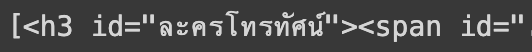

In [229]:
table = soup.find_all(name='h3', attrs={'id': "ละครโทรทัศน์"})[0].find_next('table')
print(table)

<table class="wikitable">
<tbody><tr>
<th>ปี พ.ศ.</th>
<th>เรื่อง</th>
<th>ผู้กำกับ</th>
<th>นักแสดง</th>
<th>ออกอากาศ</th>
<th>สถานีโทรทัศน์</th>
<th>บริษัทที่ร่วมผลิต
</th></tr>
<tr>
<td rowspan="3">2559</td>
<td><a class="mw-redirect" href="/wiki/%E0%B9%84%E0%B8%94%E0%B8%AD%E0%B8%B2%E0%B8%A3%E0%B8%B5%E0%B9%88%E0%B8%95%E0%B8%B8%E0%B9%8A%E0%B8%94%E0%B8%8B%E0%B8%B5%E0%B9%88%E0%B8%AA%E0%B9%8C_%E0%B9%80%E0%B8%94%E0%B8%AD%E0%B8%B0%E0%B8%8B%E0%B8%B5%E0%B8%A3%E0%B8%B5%E0%B8%AA%E0%B9%8C" title="ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์">ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์</a></td>
<td><a class="new" href="/w/index.php?title=%E0%B8%81%E0%B8%B4%E0%B8%95%E0%B8%95%E0%B8%B4%E0%B8%A0%E0%B8%B1%E0%B8%84_%E0%B8%97%E0%B8%AD%E0%B8%87%E0%B8%AD%E0%B9%88%E0%B8%A7%E0%B8%A1&amp;action=edit&amp;redlink=1" title="กิตติภัค ทองอ่วม (ไม่มีหน้านี้)">กิตติภัค ทองอ่วม</a></td>
<td><a href="/wiki/%E0%B9%80%E0%B8%9C%E0%B9%88%E0%B8%B2%E0%B9%80%E0%B8%9E%E0%B8%8A%E0%B8%A3_%E0%B9%80%E0%B8%88%E0%B8%A3%E0%B8%B4%E0%B8%8D%E0%B8%AA%E0%B8%B8%E0%B8%

ปัญหาอย่างหนึ่งของตารางนี้ คือการใช้คำสั่ง `rowspan` ทำให้แต่ละแถว `<tr>` ในตาราง อาจะมีจำนวนคอลัมน์ `<td>` ไม่เท่ากัน ส่งผลให้ชื่อหนัง อาจจะอยู่ในคอลัมน์ที่ 0 หรือ 1 ก็ได้ ขึ้นอยู่กับว่าแถวนั้นเป็นแถวแรกของปีนั้นๆหรือไม่

<img src="https://github.com/Mixelon-tera/WebScraping-2/raw/master/source/rowspan.png" width=300 >

เพื่อความง่าย เราจะไม่สนใจปีที่หนังเข้าฉายกันไปก่อน และลบ `<td>` ทุกอันที่มีการระบุค่า `rowspan` ด้วยฟังก์ชัน `extract()` เนื่องจากเดี๋ยวเราจะกลับมาใช้ตารางเต็มๆกันอีกครั้ง เราจึงต้องสร้างอีก copy `table` ไว้ก่อน


In [230]:
simplified_table = copy.copy(table) # จะเกิดอะไรขึ้นถ้าเราใช้ `simplified_table = table` ?

for td in simplified_table('td', {'rowspan': True}):
    td.extract() # ลบ element จาก DOM tree

print(urllib.parse.unquote(str(simplified_table)))

<table class="wikitable">
<tbody><tr>
<th>ปี พ.ศ.</th>
<th>เรื่อง</th>
<th>ผู้กำกับ</th>
<th>นักแสดง</th>
<th>ออกอากาศ</th>
<th>สถานีโทรทัศน์</th>
<th>บริษัทที่ร่วมผลิต
</th></tr>
<tr>

<td><a class="mw-redirect" href="/wiki/ไดอารี่ตุ๊ดซี่ส์_เดอะซีรีส์" title="ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์">ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์</a></td>
<td><a class="new" href="/w/index.php?title=กิตติภัค_ทองอ่วม&amp;action=edit&amp;redlink=1" title="กิตติภัค ทองอ่วม (ไม่มีหน้านี้)">กิตติภัค ทองอ่วม</a></td>
<td><a href="/wiki/เผ่าเพชร_เจริญสุข" title="เผ่าเพชร เจริญสุข">เผ่าเพชร เจริญสุข</a><br/><a href="/wiki/ภัทรศยา_เครือสุวรรณศิริ" title="ภัทรศยา เครือสุวรรณศิริ">ภัทรศยา เครือสุวรรณศิริ</a><br/>ธงชัย ทองกันทม<br/>รัฐนันท์ จรรยาจิรวงศ์ <br/><a href="/wiki/กฤษณภูมิ_พิบูลสงคราม" title="กฤษณภูมิ พิบูลสงคราม">กฤษณภูมิ พิบูลสงคราม</a></td>
<td>23 มกราคม พ.ศ. 2559 - 16 เมษายน พ.ศ. 2559<br/>6 กันยายน พ.ศ. 2562 - 18 ตุลาคม พ.ศ. 2562</td>
<td><a href="/wiki/จีเอ็มเอ็ม_25" title="จีเอ็มเอ็ม 25">จีเอ็มเอ็ม 25</a><br/><a h

จะเห็นได้ว่า ตอนนี้ทุกแถวมี `<td>` สามอัน เท่ากันหมดแล้ว ("ปี พ.ศ." หายไปแล้ว) ทีนี้เราก็สามารถดึงข้อมูลออกมาได้ง่ายๆตามนี้

In [231]:
for tr in simplified_table('tr'):
    cells = tr('td')
    if len(cells):  # ทำไมต้องมีบรรทัดนี้ ?
        # ใช้ .strip() เพื่อตัด space ว่างและ \n ทิ้ง ตอนแสดงผลจะได้สวยงาม
        print('"%s", "%s", "%s", "%s"\n' % (cells[0].text.strip(), cells[1].text.strip(), cells[2].text.strip(), cells[3].text.strip()))

"ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์", "กิตติภัค ทองอ่วม", "เผ่าเพชร เจริญสุขภัทรศยา เครือสุวรรณศิริธงชัย ทองกันทมรัฐนันท์ จรรยาจิรวงศ์ กฤษณภูมิ พิบูลสงคราม", "23 มกราคม พ.ศ. 2559 - 16 เมษายน พ.ศ. 25596 กันยายน พ.ศ. 2562 - 18 ตุลาคม พ.ศ. 2562"

"แก๊สโซฮัก..รักเต็มถัง", "ปัฏฐา ทองปาน", "เผ่าเพชร เจริญสุขปรีชญา พงษ์ธนานิกรณัฐรัตน์ นพรัตยาภรณ์", "6 กุมภาพันธ์ พ.ศ. 2559 - 19 มีนาคม พ.ศ. 25596 สิงหาคม พ.ศ. 2559 - 27 สิงหาคม พ.ศ. 2559"

"I See You พยาบาลพิเศษ..เคสพิศวง", "ปริญญ์ กีรติรัตนลักษณ์", "อารักษ์ อมรศุภศิริธนภพ ลีรัตนขจรชญานิษฐ์ ชาญสง่าเวชลภัสลัล จิรเวชสุนทรกุลเขมิศรา พลเดช", "7 พฤษภาคม พ.ศ. 2559 - 30 กรกฎาคม พ.ศ. 2559"

"ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์ 2", "กิตติภัค ทองอ่วม", "เผ่าเพชร เจริญสุขภัทรศยา เครือสุวรรณศิริธงชัย ทองกันทมรัฐนันท์ จรรยาจิรวงศ์ กฤษณภูมิ พิบูลสงครามกรรณ สวัสดิวัตน์ ณ อยุธยา", "11 กุมภาพันธ์ พ.ศ. 2560 - 29 เมษายน พ.ศ. 256018 ตุลาคม พ.ศ. 2562 - 29 พฤศจิกายน พ.ศ. 2562"

"โปรเจกต์ เอส เดอะซีรีส์ตอน Spike  ตอน Side by Side พี่น้องลูกขนไก่  ตอน SOS Skate ซึม ซ่าส์  ตอน Shoot! 

สำหรับคนที่อยากรู้ว่า ถ้าจะเอาข้อมูลปีที่เข้าฉายมาใช้ด้วย เราจะทำได้อย่างไร ลองพยายามทำความเข้าใจโค้ดข้างล่างนี้ดู

In [232]:
# copy ข้อมูล table ไว้เพื่อที่จะได้ไม่ต้องเก็บใหม่ ในกรณีที่ข้อมูลถูกแก้ไขหรือเสียหายก็สามารถดึงข้อมูลจากต้นฉบับได้เลย
dup_table = copy.copy(table)

rows = dup_table('tr')
header = rows[0]
n_cols = len(header('th'))

current_year = None
movies = []

# วน loop ทุกๆ row
for tr in rows[1:]:
    movie = {}

    # เลือกทุก column ในแถวนั้น จะได้ [ปี พ.ศ., เรื่อง, ออกอากาศ, สถานีโทรทัศน์, บริษัทท่ร่วมผลิต]
    cells = tr('td')

    # ถ้า column ในแถวนั้นมี attribute 'rowspan' ให้เก็บ text นั้นไว้ใน current_year
    if cells[0].has_attr('rowspan'):
        current_year = tr.td.text.strip()
        # แล้วตัด ปี พ.ศ. ออกจากตาราง เหลือ [เรื่อง, ออกอากาศ, สถานีโทรทัศน์, บริษัทท่ร่วมผลิต]
        cells = cells[1:]

    # ปี 2562 กับ 2563 ไม่ได้มี tag rowspan ทำให้ปีพ.ศ. ไม่ถูกตัดออกไป เราเลยต้องเก็บปีพ.ศ.ไว้
    # จากนั้นจึงค่อยตัดทิ้ง [หากไม่เข้าใจลองเอาออกดูสิ]
    if len(cells) == 5:
        current_year = cells[0].text
        cells = cells[1:]

    movie['year'] = current_year
    movie['name'] = cells[0].text.strip()
    movie['on air'] = '%s %s' % (cells[1].text, cells[2].text)
    movie['co-company'] = cells[3].text
    if cells[0].a is not None:
        # ต้องแปลงจากภาษาไทยให้เป็น encode-string
        movie['url'] = urllib.parse.unquote(cells[0].a['href'])
    else:
        movie['url'] = '-'
    movies.append(movie)


for m in movies:
    print(m)
    print("\n")


{'year': '2559', 'name': 'ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์', 'on air': 'กิตติภัค ทองอ่วม เผ่าเพชร เจริญสุขภัทรศยา เครือสุวรรณศิริธงชัย ทองกันทมรัฐนันท์ จรรยาจิรวงศ์ กฤษณภูมิ พิบูลสงคราม', 'co-company': '23 มกราคม พ.ศ. 2559 - 16 เมษายน พ.ศ. 25596 กันยายน พ.ศ. 2562 - 18 ตุลาคม พ.ศ. 2562', 'url': '/wiki/ไดอารี่ตุ๊ดซี่ส์_เดอะซีรีส์'}


{'year': 'แก๊สโซฮัก..รักเต็มถัง', 'name': 'ปัฏฐา ทองปาน', 'on air': 'เผ่าเพชร เจริญสุขปรีชญา พงษ์ธนานิกรณัฐรัตน์ นพรัตยาภรณ์ 6 กุมภาพันธ์ พ.ศ. 2559 - 19 มีนาคม พ.ศ. 25596 สิงหาคม พ.ศ. 2559 - 27 สิงหาคม พ.ศ. 2559\n', 'co-company': 'ไลน์ทีวีจีเอ็มเอ็ม 25\n', 'url': '/w/index.php?title=ปัฏฐา_ทองปาน&action=edit&redlink=1'}


{'year': 'แก๊สโซฮัก..รักเต็มถัง', 'name': 'I See You พยาบาลพิเศษ..เคสพิศวง', 'on air': 'ปริญญ์ กีรติรัตนลักษณ์  อารักษ์ อมรศุภศิริธนภพ ลีรัตนขจรชญานิษฐ์ ชาญสง่าเวชลภัสลัล จิรเวชสุนทรกุลเขมิศรา พลเดช', 'co-company': '7 พฤษภาคม พ.ศ. 2559 - 30 กรกฎาคม พ.ศ. 2559', 'url': '/w/index.php?title=I_See_You_พยาบาลพิเศษ..เคสพิศวง&action=edit&redlink=1'}


{'

ถึงตอนนี้ทุกคนอาจจะสงสัยว่า ทำไมเราต้องเขียนโค้ดให้มันวุ่นวายขนาดนี้ แค่ copy/paste แป๊ปเดียวก็เสร็จแล้ว

ถูกต้อง! และ Data scientist ที่ดีก็ควรจะเลือกใช้วิธีที่ช่วยให้เราทำงานได้เร็วที่สุด

แต่...ตัวอย่างข้างต้นนั้น เป็นเพียงตัวอย่างง่ายๆเท่านั้น ในตัวอย่างถัดไป เราจะมาดึงข้อมูลว่าหนังแต่ละเรื่องใครกำกับ ซึ่งข้อมูลนี้ไม่ได้ให้มาในตาราง แต่เราสามารถหาได้ในหน้าวิกิของหนังแต่ละเรื่อง

In [233]:
# โค๊ดคล้ายเดิมกับ block ก่อนหน้านี้เลย ต่างกันแค่เอา urllib.parse.unquote ออก
# เราเอากลับมาเป็น % encode เหมือนเดิมเพราะภาษาไทยใช้ในการแสดงผลเท่านั้น
# ไม่สามารถนำ url ที่มีภาษาไทยต่อท้ายมา crawl data ได้

movies = []

for tr in rows[1:]:
    movie = {}
    cells = tr('td')
    if cells[0].has_attr('rowspan'):
        current_year = tr.td.text
        cells = cells[1:]
    if len(cells) == 5:
        current_year = cells[0].text
        cells = cells[1:]
    movie['year'] = current_year
    movie['name'] = cells[0].text.strip()
    movie['on air'] = '%s %s' % (cells[1].text, cells[2].text)
    movie['co-company'] = cells[3].text
    if cells[0].a is not None:
        # ครั้งนี้ไม่ต้อง unquote string แล้วในการนำไปใช้เราต้องใช้แบบ encode-string
        movie['url'] = cells[0].a['href']
    else:
        movie['url'] = '-'
    movies.append(movie)

for m in movies:
    print(m)
    print("\n")
# print(movies)

{'year': '2559', 'name': 'ไดอารี่ตุ๊ดซี่ส์ เดอะซีรีส์', 'on air': 'กิตติภัค ทองอ่วม เผ่าเพชร เจริญสุขภัทรศยา เครือสุวรรณศิริธงชัย ทองกันทมรัฐนันท์ จรรยาจิรวงศ์ กฤษณภูมิ พิบูลสงคราม', 'co-company': '23 มกราคม พ.ศ. 2559 - 16 เมษายน พ.ศ. 25596 กันยายน พ.ศ. 2562 - 18 ตุลาคม พ.ศ. 2562', 'url': '/wiki/%E0%B9%84%E0%B8%94%E0%B8%AD%E0%B8%B2%E0%B8%A3%E0%B8%B5%E0%B9%88%E0%B8%95%E0%B8%B8%E0%B9%8A%E0%B8%94%E0%B8%8B%E0%B8%B5%E0%B9%88%E0%B8%AA%E0%B9%8C_%E0%B9%80%E0%B8%94%E0%B8%AD%E0%B8%B0%E0%B8%8B%E0%B8%B5%E0%B8%A3%E0%B8%B5%E0%B8%AA%E0%B9%8C'}


{'year': 'แก๊สโซฮัก..รักเต็มถัง', 'name': 'ปัฏฐา ทองปาน', 'on air': 'เผ่าเพชร เจริญสุขปรีชญา พงษ์ธนานิกรณัฐรัตน์ นพรัตยาภรณ์ 6 กุมภาพันธ์ พ.ศ. 2559 - 19 มีนาคม พ.ศ. 25596 สิงหาคม พ.ศ. 2559 - 27 สิงหาคม พ.ศ. 2559\n', 'co-company': 'ไลน์ทีวีจีเอ็มเอ็ม 25\n', 'url': '/w/index.php?title=%E0%B8%9B%E0%B8%B1%E0%B8%8F%E0%B8%90%E0%B8%B2_%E0%B8%97%E0%B8%AD%E0%B8%87%E0%B8%9B%E0%B8%B2%E0%B8%99&action=edit&redlink=1'}


{'year': 'แก๊สโซฮัก..รักเต็มถัง', 'name': 'I See You

In [251]:
for movie in movies:
    print('Processing ' + movie['name'] + '...')
    url = 'http://th.wikipedia.com' + movie['url']

    if len(movie['url']) < 5:
        movie["directors"] = "unknown"
        continue
    
    movie_req = urllib.request.Request(url, headers={"User-Agent": "gchan.moe"})
    movie_html = urllib.request.urlopen(movie_req)
    movie_soup = BeautifulSoup(movie_html, 'html.parser')

    try:
        direct_td = movie_soup.find('th', text='กำกับโดย').find_next()
        movie['directors'] = [x.text for x in direct_td('a')] # list comprehension
    except:
        movie['directors'] = 'unknown'

    # มารยาทในการดึงข้อมูลเราควรที่จะต้องใส่ sleep เพื่อไม่ให้ server ทำงานหนักเกินไป
    sleep(1)

C:\Users\sitti\AppData\Local\Temp\ipykernel_17492\2474786095.py:14: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  direct_td = movie_soup.find('th', text='กำกับโดย').find_next()


In [252]:
# แสดงผลรายชื่อผู้กำกับของหนังแต่ละเรื่อง (ถ้ามี)
for m in movies:
    print("%s \t\t %s" % (m['name'], m['directors']))

แฟนเดย์..แฟนกันแค่วันเดียว 		 unknown
พรจากฟ้า 		 unknown
ฉลาดเกมส์โกง 		 unknown
เพื่อน..ที่ระลึก 		 unknown
น้อง.พี่.ที่รัก 		 unknown
2,215 เชื่อ บ้า กล้า ก้าว 		 unknown
โฮมสเตย์ 		 unknown
Friend Zone ระวัง..สิ้นสุดทางเพื่อน 		 unknown
ตุ๊ดซี่ส์ แอนด์ เดอะเฟค 		 unknown
ฮาวทูทิ้ง..ทิ้งอย่างไรไม่ให้เหลือเธอ 		 unknown
อ้าย..คนหล่อลวง 		 unknown
โกสต์แล็บ..ฉีกกฎทดลองผี 		 unknown
ร่างทรง 		 unknown
เร็วโหด..เหมือนโกรธเธอ 		 unknown
บุพเพสันนิวาส 2 		 unknown
OMG! รักจังวะ..ผิดจังหวะ 		 unknown
เธอกับฉันกับฉัน 		 unknown
บ้านเช่า..บูชายัญ 		 unknown
เพื่อน(ไม่)สนิท 		 unknown
หลานม่า 		 unknown
วิมานหนาม 		 unknown
404 สุขีนิรันดร์..RUN RUN 		 unknown
แฟลตเกิร์ล ชั้นห่างระหว่าง เ ร า 		 unknown
ซองแดงแต่งผี 		 unknown
ดีว่า..ราวี 		 unknown
Human Resource (Working Title) 		 unknown
GOHAN (Working Title) 		 unknown
Inherit (Working Title) 		 unknown
50 First Dates (Working Title) 		 unknown


# Section 4: Assignment

### Assignment : ผลงานภาพยนตร์ของ GDH

ในแบบฝึกหัดต่อไป เราจะมาทำการดึงข้อมูลภาพยนตร์ของ GDH จากหน้าวิกิพีเดียกัน ว่าหนังแต่ละเรื่องเข้าฉายเมื่อไหร่ ทำรายได้ไปมากน้อยแค่ไหน และใครเป็นผู้กำกับ

*** ความยากของตารางนี้คือมี rowspan มากกว่า 1 column ทำให้ต้องคิดนิดนึงว่าจะรับมือกับปัญหานี้อย่างไรดี ***

![Alt text](https://drive.google.com/uc?export=view&id=17E0i2dIMJoY-bgDbaTyieJMLiVT6aUXc)

เช่นเคย เรามาเริ่มต้นจากการหา `<table>` ที่เราต้องการกันก่อน

In [236]:
# 4.1.1 : ค้นหาตารางที่เก็บข้อมูลภาพยนตร์
table2 = soup.find(name='h3', id='ภาพยนตร์').find_next('table')

print(str(table2)[:1000])

<table class="wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th>ปี</th>
<th>ลำดับ</th>
<th>ชื่อ</th>
<th>ผู้กำกับ</th>
<th>บริษัทผู้สร้าง</th>
<th>นักแสดง</th>
<th>วันออกฉาย</th>
<th>รายได้<br/>(กรุงเทพฯ ปริมณฑล<br/>และเชียงใหม่)</th>
<th>รายได้รวมทั่วประเทศ
</th></tr>
<tr>
<td rowspan="2">2559
</td>
<td align="center">1
</td>
<td><i><a href="/wiki/%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%A2%E0%B9%8C..%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B9%81%E0%B8%84%E0%B9%88%E0%B8%A7%E0%B8%B1%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A7" title="แฟนเดย์..แฟนกันแค่วันเดียว">แฟนเดย์..แฟนกันแค่วันเดียว</a></i>
</td>
<td><a href="/wiki/%E0%B8%9A%E0%B8%A3%E0%B8%A3%E0%B8%88%E0%B8%87_%E0%B8%9B%E0%B8%B4%E0%B8%AA%E0%B8%B1%E0%B8%8D%E0%B8%98%E0%B8%99%E0%B8%B0%E0%B8%81%E0%B8%B9%E0%B8%A5" title="บรรจง ปิสัญธนะกูล">บรรจง ปิสัญธนะกูล</a>
</td>
<td><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="

In [237]:
# 4.1.2 : copy ตาราง และ extract 'rowspan' ทิ้ง

simplified_table2 = copy.copy(table2)

for td in simplified_table2('td', { 'rowspan': True }):
	td.extract()

print(simplified_table2)


<table class="wikitable">
<tbody><tr bgcolor="#CCCCCC">
<th>ปี</th>
<th>ลำดับ</th>
<th>ชื่อ</th>
<th>ผู้กำกับ</th>
<th>บริษัทผู้สร้าง</th>
<th>นักแสดง</th>
<th>วันออกฉาย</th>
<th>รายได้<br/>(กรุงเทพฯ ปริมณฑล<br/>และเชียงใหม่)</th>
<th>รายได้รวมทั่วประเทศ
</th></tr>
<tr>

<td align="center">1
</td>
<td><i><a href="/wiki/%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%A2%E0%B9%8C..%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B9%81%E0%B8%84%E0%B9%88%E0%B8%A7%E0%B8%B1%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A7" title="แฟนเดย์..แฟนกันแค่วันเดียว">แฟนเดย์..แฟนกันแค่วันเดียว</a></i>
</td>
<td><a href="/wiki/%E0%B8%9A%E0%B8%A3%E0%B8%A3%E0%B8%88%E0%B8%87_%E0%B8%9B%E0%B8%B4%E0%B8%AA%E0%B8%B1%E0%B8%8D%E0%B8%98%E0%B8%99%E0%B8%B0%E0%B8%81%E0%B8%B9%E0%B8%A5" title="บรรจง ปิสัญธนะกูล">บรรจง ปิสัญธนะกูล</a>
</td>
<td><a href="/wiki/%E0%B8%88%E0%B8%AD%E0%B8%81%E0%B8%A7%E0%B9%89%E0%B8%B2%E0%B8%87_%E0%B8%9F%E0%B8%B4%E0%B8%A5%E0%B9%8C%E0%B8%A1" title="จอกว้าง ฟิล์ม">จอกว้าง ฟิล

In [238]:
# 4.1.3 : แสดงข้อมูลหลังจากที่ extract 'rowspan' ทิ้งไปแล้ว
# สังเกตได้ว่า บาง row มีข้อมูล 3 elements บาง row มี 4 elements หรือมากกว่าขึ้นกับว่า แถวนั้นโดน extract 'rowspan' ไปหรือไม่
# *** Block นี้ไม่ต้องเติมอะไร * **

for tr in simplified_table2('tr'):
    cells = tr('td')
    if len(cells):
        try:
            print('"%s", "%s", "%s", "%s"' % (cells[0].text, cells[1].text, cells[2].text, cells[3].text))
            print()
        except:
            print('"%s", "%s", "%s"' % (cells[0].text, cells[1].text, cells[2].text))
            print()

"1
", "แฟนเดย์..แฟนกันแค่วันเดียว
", "บรรจง ปิสัญธนะกูล
", "จอกว้าง ฟิล์ม
"

"2
", "พรจากฟ้า
", "จิระ มะลิกุลนิธิวัฒน์ ธราธรชยนพ บุญประกอบเกรียงไกร วชิรธรรมพร
", "จอกว้าง ฟิล์มสิงห์ คอร์ปอเรชั่น
"

"3
", "ฉลาดเกมส์โกง
", "นัฐวุฒิ พูนพิริยะ
", "ชุติมณฑน์ จึงเจริญสุขยิ่งชานน สันตินธรกุลธีรดนย์ ศุภพันธุ์ภิญโญอิษยา ฮอสุวรรณ
"

"4
", "เพื่อน..ที่ระลึก
", "โสภณ ศักดาพิศิษฏ์
", "น้ำทิพย์ จงรัชตวิบูลย์ณิชภาลักษณ์ ทองคำ
"

"5
", "น้อง.พี่.ที่รัก
", "วิทยา ทองอยู่ยง
", "ซันนี่ สุวรรณเมธานนท์อุรัสยา เสปอร์บันด์นิชคุณ หรเวชกุล
"

"6
", "2,215 เชื่อ บ้า กล้า ก้าว
", "ณฐพล บุญประกอบ
", "จีดีเอช ห้าห้าเก้าก้าวคนละก้าวคิง เพาเวอร์
"

"7
", "โฮมสเตย์
", "ภาคภูมิ วงศ์ภูมิ
", "ธีรดนย์ ศุภพันธุ์ภิญโญเฌอปราง อารีย์กุล
"

"8
", "Friend Zone ระวัง..สิ้นสุดทางเพื่อน
", "ชยนพ บุญประกอบ
", "ณภัทร เสียงสมบุญ พิมพ์ชนก ลือวิเศษไพบูลย์
"

"9
", "ตุ๊ดซี่ส์ แอนด์ เดอะเฟค
", "กิตติภัค ทองอ่วม
", "อารยา เอ ฮาร์เก็ต เผ่าเพชร เจริญสุขภัทรศยา เครือสุวรรณศิริธงชัย ทองกันทมรัฐนันท์ จรรยาจิรวงศ์ กฤษณภูมิ พิบูลสงครามกรรณ สวัส

In [247]:
import pandas as pd
from IPython.display import display

สำหรับคนที่อยากรู้ว่า ถ้าจะเอาข้อมูลปีที่เข้าฉายมาใช้ด้วย เราจะทำได้อย่างไร ลองพยายามทำความเข้าใจโค้ดข้างล่างนี้ดู

In [246]:
# 4.1.4 : copy ข้อมูล table ไว้เพื่อที่จะได้ไม่ต้องเก็บใหม่ ในกรณีที่ข้อมูลถูกแก้ไขหรือเสียหายก็สามารถดึงข้อมูลจากต้นฉบับได้เลย
# code ที่ให้มาเป็นเพียง code ตัวอย่าง ไม่จำเป็นต้องใช้ตามนี้ก็ได้ จะเขียนใหม่เองทั้งหมดก็ได้

dup_table2 = copy.copy(table2)

rows = dup_table2('tr')
header = rows[0]

year, year_left = None, 0
company, company_left = None, 0
movies = []

for tr in rows[1:]:
    movie = {}

    # เลือกทุก column ในแถวนั้น จะได้ [ปี พ.ศ., ลำดับ, ชื่อ, ผู้กำกับ, บริษัทผู้สร้าง, วันออกฉาย]
    cells = tr('td')

    year_shift = 0
    if year_left > 0:
        year_left -= 1
        year_shift -= 1
    else:
        year = cells[0].text.rstrip()
    if cells[0].has_attr('rowspan'):
        year = cells[0].text.rstrip()
        year_left = int(cells[0]['rowspan']) - 1

    company_shift = year_shift
    if company_left > 0:
        company_left -= 1
        company_shift -= 1
    else:
        company = cells[4+company_shift].text.rstrip()

    if cells[4+company_shift].has_attr('rowspan'):
        company = cells[4+company_shift].text.rstrip()
        company_left = int(cells[4+company_shift]['rowspan']) - 1

    # # เขียนเงื่อนไขอะไรบางอย่างเพื่อทำให้ผลลัพธ์ถูกต้อง
    


    # ########################################

    movie['year'] = year
    movie['name'] = cells[2+year_shift].text.rstrip()
    movie['director'] = cells[3+year_shift].text.rstrip()
    movie['company'] = company
    movie['release'] = cells[6+company_shift].text.rstrip()

    # เราจะหา link ของรายชื่อหนังไปเก็บไว้ใน movie['url'] เฉพาะหนังที่มี link เท่านั้น
    # ภาพยนตร์ที่ไม่มี link ให้เก็บค่า - แทน
    if cells[2+year_shift].a is not None:
        # ต้องแปลงจากภาษาไทยให้เป็น encode-string
        movie['url'] = cells[2+year_shift].a['href']
    else:
        movie['url'] = '-'

    movies.append(movie)

# df = pd.DataFrame(movies, columns=headers)
df = pd.DataFrame(movies)
print(display(df))

# วนลูปเพื่อแสดงผลลัพธ์ข้อมูลของภาพยนตร์
for m in movies:
    print(m)
    print("\n")

,year,name,director,company,release,url
0,2559,แฟนเดย์..แฟนกันแค่วันเดียว,บรรจง ปิสัญธนะกูล,จอกว้าง ฟิล์ม,1 กันยายน,/wiki/%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B9%80%E0%...
1,2559,พรจากฟ้า,จิระ มะลิกุลนิธิวัฒน์ ธราธรชยนพ บุญประกอบเกรีย...,จอกว้าง ฟิล์มสิงห์ คอร์ปอเรชั่น,1 ธันวาคม,/wiki/%E0%B8%9E%E0%B8%A3%E0%B8%88%E0%B8%B2%E0%...
2,2560,ฉลาดเกมส์โกง,นัฐวุฒิ พูนพิริยะ,จอกว้าง ฟิล์ม,3 พฤษภาคม,/wiki/%E0%B8%89%E0%B8%A5%E0%B8%B2%E0%B8%94%E0%...
3,2560,เพื่อน..ที่ระลึก,โสภณ ศักดาพิศิษฏ์,จอกว้าง ฟิล์ม,7 กันยายน,/wiki/%E0%B9%80%E0%B8%9E%E0%B8%B7%E0%B9%88%E0%...
4,2561,น้อง.พี่.ที่รัก,วิทยา ทองอยู่ยง,จอกว้าง ฟิล์ม,10 พฤษภาคม,/wiki/%E0%B8%99%E0%B9%89%E0%B8%AD%E0%B8%87.%E0...
5,2561,"2,215 เชื่อ บ้า กล้า ก้าว",ณฐพล บุญประกอบ,จีดีเอช ห้าห้าเก้าก้าวคนละก้าวคิง เพาเวอร์,6-16 กันยายน,"/wiki/2,215_%E0%B9%80%E0%B8%8A%E0%B8%B7%E0%B9%..."
6,2561,โฮมสเตย์,ภาคภูมิ วงศ์ภูมิ,จอกว้าง ฟิล์ม,25 ตุลาคม,/wiki/%E0%B9%82%E0%B8%AE%E0%B8%A1%E0%B8%AA%E0%...
7,2562,Friend Zone ระวัง..สิ้นสุดทางเพื่อน,ชยนพ บุญประกอบ,จอกว้าง ฟิล์ม,14 กุมภาพันธ์,/wiki/Friend_Zone_%E0%B8%A3%E0%B8%B0%E0%B8%A7%...
8,2562,ตุ๊ดซี่ส์ แอนด์ เดอะเฟค,กิตติภัค ทองอ่วม,จอกว้าง ฟิล์ม,5 ธันวาคม,/wiki/%E0%B8%95%E0%B8%B8%E0%B9%8A%E0%B8%94%E0%...
9,2562,ฮาวทูทิ้ง..ทิ้งอย่างไรไม่ให้เหลือเธอ,นวพล ธำรงรัตนฤทธิ์,เวรี่ แซด พิคเจอร์สแฮปปี้ เอนดิ้ง ฟิล์ม,26 ธันวาคม,/wiki/%E0%B8%AE%E0%B8%B2%E0%B8%A7%E0%B8%97%E0%...


None
{'year': '2559', 'name': 'แฟนเดย์..แฟนกันแค่วันเดียว', 'director': 'บรรจง ปิสัญธนะกูล', 'company': 'จอกว้าง ฟิล์ม', 'release': '1 กันยายน', 'url': '/wiki/%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%A2%E0%B9%8C..%E0%B9%81%E0%B8%9F%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B9%81%E0%B8%84%E0%B9%88%E0%B8%A7%E0%B8%B1%E0%B8%99%E0%B9%80%E0%B8%94%E0%B8%B5%E0%B8%A2%E0%B8%A7'}


{'year': '2559', 'name': 'พรจากฟ้า', 'director': 'จิระ มะลิกุลนิธิวัฒน์ ธราธรชยนพ บุญประกอบเกรียงไกร วชิรธรรมพร', 'company': 'จอกว้าง ฟิล์มสิงห์ คอร์ปอเรชั่น', 'release': '1 ธันวาคม', 'url': '/wiki/%E0%B8%9E%E0%B8%A3%E0%B8%88%E0%B8%B2%E0%B8%81%E0%B8%9F%E0%B9%89%E0%B8%B2'}


{'year': '2560', 'name': 'ฉลาดเกมส์โกง', 'director': 'นัฐวุฒิ พูนพิริยะ', 'company': 'จอกว้าง ฟิล์ม', 'release': '3 พฤษภาคม', 'url': '/wiki/%E0%B8%89%E0%B8%A5%E0%B8%B2%E0%B8%94%E0%B9%80%E0%B8%81%E0%B8%A1%E0%B8%AA%E0%B9%8C%E0%B9%82%E0%B8%81%E0%B8%87'}


{'year': '2560', 'name': 'เพื่อน..ที่ระลึก', 'director': 'โสภณ ศักดาพิศิษฏ์', 'company': '

ข้อมูลควรออกมาประมาณนี้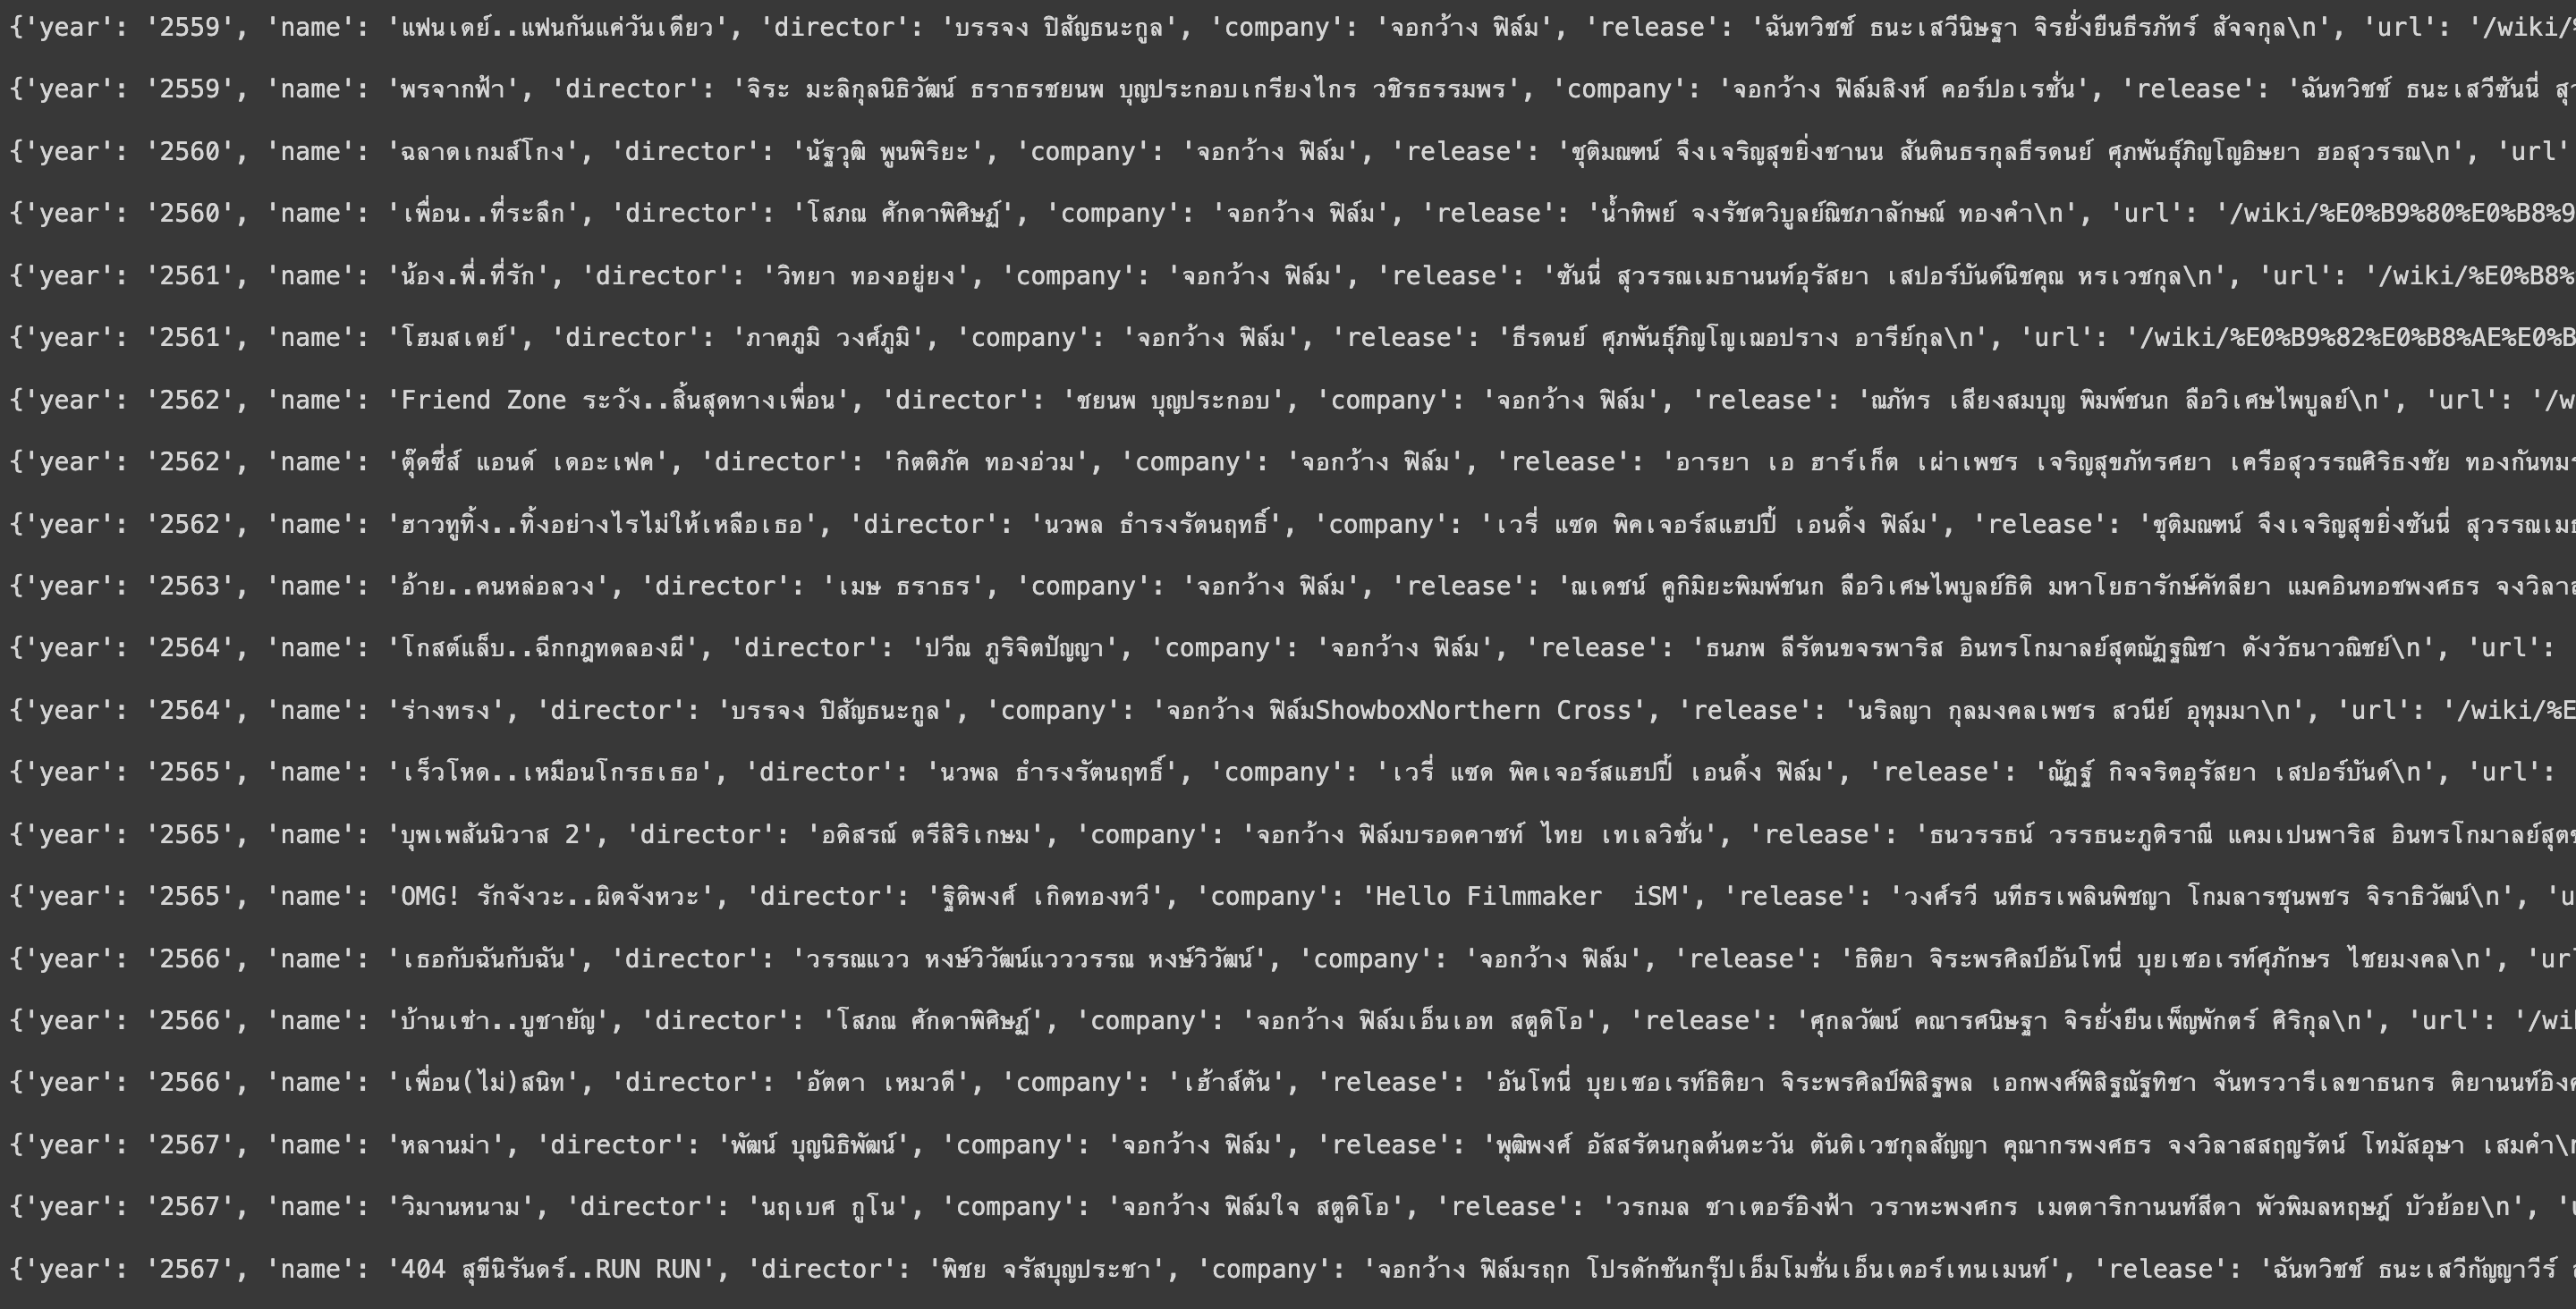

นำข้อมูลรายได้ของหนังแต่ละเรื่อง (เฉพาะภาพยนตร์ที่มี link) มาแสดงผล

In [249]:
# 4.1.5 : แสดงผลรายได้ของหนังแต่ละเรื่อง

for movie in movies:
    print('Processing ' + movie['name'] + '...')

    try:
        gross_url = 'http://th.wikipedia.com' + movie['url']
        gross_req = urllib.request.Request(gross_url, headers={"User-Agent": "gchan.moe"})
        movie_html = urllib.request.urlopen(gross_req).read()
        movie_soup = BeautifulSoup(movie_html, 'html.parser')

        # ค้นหารายได้ของภาพยนตร์
        for tr in movie_soup.find("table", {"class": "infobox vevent"}).find_all("tr")[::-1]:
            if tr.th is None:
                continue  
            if tr.th.text.strip() == "ทำเงิน":
                income_td = tr.td
                break
        movie['gross'] = income_td.text.split(" ")[0]
    except Exception as e:
        movie['gross'] = 'unknown'

    # มารยาทในการดึงข้อมูลเราควรที่จะต้องใส่ sleep เพื่อไม่ให้ server ทำงานหนักเกินไป
    sleep(1)

Processing แฟนเดย์..แฟนกันแค่วันเดียว...
Processing พรจากฟ้า...
Processing ฉลาดเกมส์โกง...
Processing เพื่อน..ที่ระลึก...
Processing น้อง.พี่.ที่รัก...
Processing 2,215 เชื่อ บ้า กล้า ก้าว...
Processing โฮมสเตย์...
Processing Friend Zone ระวัง..สิ้นสุดทางเพื่อน...
Processing ตุ๊ดซี่ส์ แอนด์ เดอะเฟค...
Processing ฮาวทูทิ้ง..ทิ้งอย่างไรไม่ให้เหลือเธอ...
Processing อ้าย..คนหล่อลวง...
Processing โกสต์แล็บ..ฉีกกฎทดลองผี...
Processing ร่างทรง...
Processing เร็วโหด..เหมือนโกรธเธอ...
Processing บุพเพสันนิวาส 2...
Processing OMG! รักจังวะ..ผิดจังหวะ...
Processing เธอกับฉันกับฉัน...
Processing บ้านเช่า..บูชายัญ...
Processing เพื่อน(ไม่)สนิท...
Processing หลานม่า...
Processing วิมานหนาม...
Processing 404 สุขีนิรันดร์..RUN RUN...
Processing แฟลตเกิร์ล ชั้นห่างระหว่าง เ ร า...
Processing ซองแดงแต่งผี...
Processing ดีว่า..ราวี...
Processing Human Resource (Working Title)...
Processing GOHAN (Working Title)...
Processing Inherit (Working Title)...
Processing 50 First Dates (Working Title)...


In [250]:
df = pd.DataFrame([{"name": m["name"], "release": m["release"], "director": m["director"], "gross": m["gross"] + " ล้านบาท"} for m in movies])
print(display(df))

for m in movies:
      print('"%s", "%s", "%s", "%s ล้านบาท"' %
            (m['name'], m['release'], m['director'], m['gross']))
      print()

,name,release,director,gross
0,แฟนเดย์..แฟนกันแค่วันเดียว,1 กันยายน,บรรจง ปิสัญธนะกูล,110.91 ล้านบาท
1,พรจากฟ้า,1 ธันวาคม,จิระ มะลิกุลนิธิวัฒน์ ธราธรชยนพ บุญประกอบเกรีย...,43 ล้านบาท
2,ฉลาดเกมส์โกง,3 พฤษภาคม,นัฐวุฒิ พูนพิริยะ,112.15 ล้านบาท
3,เพื่อน..ที่ระลึก,7 กันยายน,โสภณ ศักดาพิศิษฏ์,35 ล้านบาท
4,น้อง.พี่.ที่รัก,10 พฤษภาคม,วิทยา ทองอยู่ยง,244.77 ล้านบาท
5,"2,215 เชื่อ บ้า กล้า ก้าว",6-16 กันยายน,ณฐพล บุญประกอบ,7.36 ล้านบาท
6,โฮมสเตย์,25 ตุลาคม,ภาคภูมิ วงศ์ภูมิ,66.75 ล้านบาท
7,Friend Zone ระวัง..สิ้นสุดทางเพื่อน,14 กุมภาพันธ์,ชยนพ บุญประกอบ,134.15 ล้านบาท
8,ตุ๊ดซี่ส์ แอนด์ เดอะเฟค,5 ธันวาคม,กิตติภัค ทองอ่วม,140.02 ล้านบาท
9,ฮาวทูทิ้ง..ทิ้งอย่างไรไม่ให้เหลือเธอ,26 ธันวาคม,นวพล ธำรงรัตนฤทธิ์,57 ล้านบาท


None
"แฟนเดย์..แฟนกันแค่วันเดียว", "1 กันยายน", "บรรจง ปิสัญธนะกูล", "110.91 ล้านบาท"

"พรจากฟ้า", "1 ธันวาคม", "จิระ มะลิกุลนิธิวัฒน์ ธราธรชยนพ บุญประกอบเกรียงไกร วชิรธรรมพร", "43 ล้านบาท"

"ฉลาดเกมส์โกง", "3 พฤษภาคม", "นัฐวุฒิ พูนพิริยะ", "112.15 ล้านบาท"

"เพื่อน..ที่ระลึก", "7 กันยายน", "โสภณ ศักดาพิศิษฏ์", "35 ล้านบาท"

"น้อง.พี่.ที่รัก", "10 พฤษภาคม", "วิทยา ทองอยู่ยง", "244.77 ล้านบาท"

"2,215 เชื่อ บ้า กล้า ก้าว", "6-16 กันยายน", "ณฐพล บุญประกอบ", "7.36 ล้านบาท"

"โฮมสเตย์", "25 ตุลาคม", "ภาคภูมิ วงศ์ภูมิ", "66.75 ล้านบาท"

"Friend Zone ระวัง..สิ้นสุดทางเพื่อน", "14 กุมภาพันธ์", "ชยนพ บุญประกอบ", "134.15 ล้านบาท"

"ตุ๊ดซี่ส์ แอนด์ เดอะเฟค", "5 ธันวาคม", "กิตติภัค ทองอ่วม", "140.02 ล้านบาท"

"ฮาวทูทิ้ง..ทิ้งอย่างไรไม่ให้เหลือเธอ", "26 ธันวาคม", "นวพล ธำรงรัตนฤทธิ์", "57 ล้านบาท"

"อ้าย..คนหล่อลวง", "3 ธันวาคม", "เมษ ธราธร", "56.5 ล้านบาท"

"โกสต์แล็บ..ฉีกกฎทดลองผี", "26 พฤษภาคม", "ปวีณ ภูริจิตปัญญา", "56.5 ล้านบาท"

"ร่างทรง", "14 กรกฎาคม (เกาหลี)28 ตุลาคม (ไทย)", "บรรจง ปิสัญธน